In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the dataset and analyzing the first few rows
screening_data = pd.read_csv(r'D:\Autism-Spectrum-Disorder--Medical-Analyisis\datasets 1\Autism_Screening_Data_Combined.csv')
toddler_autism_data = pd.read_csv(r'D:\Autism-Spectrum-Disorder--Medical-Analyisis\datasets 1\Toddler Autism dataset July 2018.csv')

Checking for the missing values 

In [7]:
screening_data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


In [ ]:
screening_data.info()
# No null values in the dataset 

In [20]:
toddler_autism_data.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [22]:
toddler_autism_data.tail()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No
1053,1054,1,1,0,0,1,1,0,1,1,0,24,6,m,asian,yes,yes,family member,Yes


In [ ]:
toddler_autism_data.info()
# No null values in the dataset

Exploratory Analysis

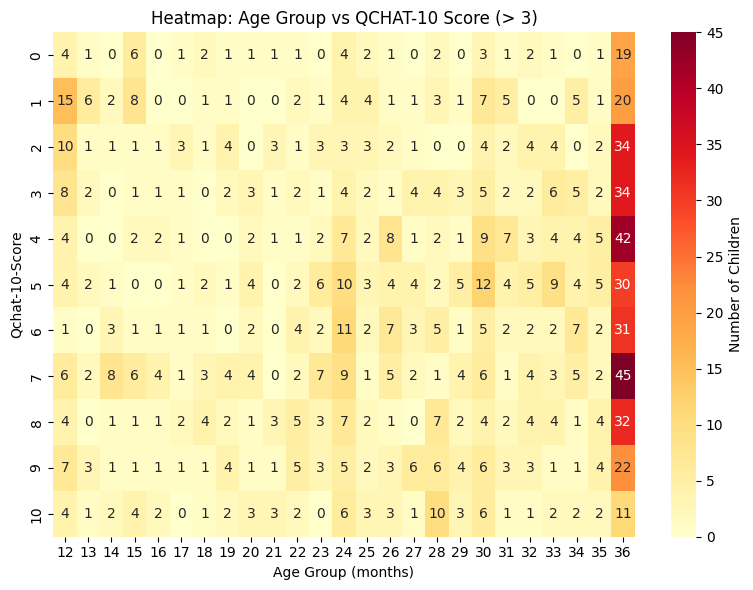

In [8]:
# Visualizing the dataset

toddler_autism_data['Age_Group'] = pd.cut(
    toddler_autism_data['Age_Mons'],
    bins=[17, 20, 23, 26, 29, 36],
    labels=['18-20', '21-23', '24-26', '27-29', '30-36']
)

# Create a pivot table to count how many kids fall into each (Age_Group, Qchat Score)
heatmap_data = toddler_autism_data.pivot_table(
    index='Qchat-10-Score', 
    columns='Age_Mons', 
    values='Case_No',
    aggfunc='count'
).fillna(0)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", cbar_kws={'label': 'Number of Children'})
plt.title("Heatmap: Age Group vs QCHAT-10 Score (> 3)")
plt.xlabel("Age Group (months)")
plt.ylabel("Qchat-10-Score")
plt.tight_layout()
plt.show()

"Comparison of toddlers diagnosed with ASD based on presence or absence of a family history of ASD."

In [1]:
# Group by Family ASD and ASD Traits
comparison_family_traits = toddler_autism_data.groupby(['Family_mem_with_ASD', 'Class/ASD Traits']).size().unstack(fill_value=0)

# Plotting
comparison_family_traits.plot(kind='bar',stacked=True, figsize=(8, 6), color=['blue'])

plt.title('ASD Traits vs Family History of ASD')
plt.xlabel('Background of Family Member with ASD')
plt.ylabel('Number of Toddlers')
plt.legend(title='ASD Traits')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.figure(figsize=(8, 6))
plt.show()

NameError: name 'toddler_autism_data' is not defined